In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
ano = 2023
caminho_dados = f"/content/drive/MyDrive/Ad/{ano}_Viagem.csv"
caminho_saida_tabela = f'/content/drive/MyDrive/Ad/output/tabela_{ano}.xlsx'
caminho_saida_grafico = f'/content/drive/MyDrive/Ad/output/grafico_{ano}.png'

In [13]:
# Lendo dados
df_viagens = pd.read_csv(caminho_dados, encoding="Windows-1252", sep=";", decimal =',')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

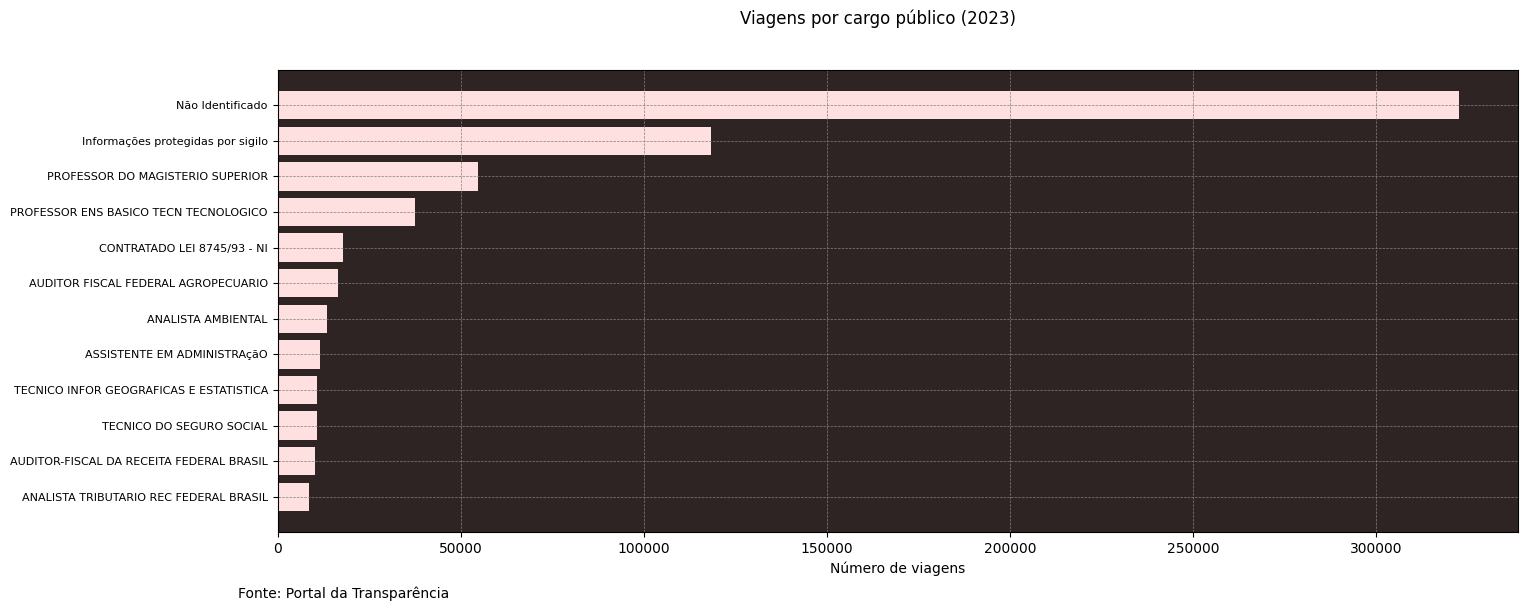

In [14]:
# Criando coluna de despesas
df_viagens["Despesas"] = df_viagens["Valor diárias"]  + df_viagens["Valor passagens"]  + df_viagens["Valor outros gastos"]

#Ajustando Valores nulos na coluna de cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('Não Identificado')

#Convertendo colunas de datas
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format='%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format='%d/%m/%Y')

# Criando novas colunas de datas
df_viagens['Mês da Viagem'] = df_viagens['Período - Data de início'].dt.month_name()

df_viagens['Dias da Viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

#Criando Tabela consolidada

df_viagens_consolidado = (
    df_viagens
    .groupby('Cargo')
    .agg(
        despesa_media=('Despesas', 'mean'),
        duracao_media=('Dias da Viagem', 'mean'),
        despesa_totais=('Despesas', 'sum'),
        destino_mais_frequente=('Destinos', pd.Series.mode),
        numero_viagens=('Nome', 'count')
        )
    .reset_index()
    )

#Filtrando tabaela por cargos relevantes (> 1% das viagens)
df_cargo = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargo.loc[df_cargo['proportion']> 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

#Chegando na tabela final - consolidada e filtrada
df_final = df_viagens_consolidado[filtro].sort_values(by='numero_viagens', ascending=False)

#salvando a tabela final
df_final.to_excel(caminho_saida_tabela, index=False)

#Criando a figura
fig, ax = plt.subplots(figsize=(16, 6))

#Plotando o gráfico
ax.barh(df_final['Cargo'], df_final['numero_viagens'], color = '#ffe0e0')
ax.invert_yaxis()

#Ajustando o gráfico
ax.set_facecolor('#2e2424')

fig.suptitle('Viagens por cargo público (2023)')

plt.figtext(0.10, 0.0, 'Fonte: Portal da Transparência')

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)

plt.xlabel('Número de viagens')
#Salvando o grafico
plt.savefig(caminho_saida_grafico, bbox_inches='tight')



,Cargo,despesa_media,duracao_media,despesa_totais,destino_mais_frequente,numero_viagens
494,Não Identificado,3259.62,8.02,1051278000.39,Brasília/DF,322516
443,Informações protegidas por sigilo,3142.85,7.43,371827233.04,Informações protegidas por sigilo,118309
569,PROFESSOR DO MAGISTERIO SUPERIOR,2031.38,4.05,111092315.57,Brasília/DF,54688
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,1402.50,2.36,52650024.17,Brasília/DF,37540
315,CONTRATADO LEI 8745/93 - NI,984.45,2.84,17510463.07,Bauru/SP,17787
208,AUDITOR FISCAL FEDERAL AGROPECUARIO,1466.27,2.06,24315111.98,Brasília/DF,16583
72,ANALISTA AMBIENTAL,2595.69,5.13,35350746.75,Brasília/DF,13619
179,ASSISTENTE EM ADMINISTRAçãO,1291.46,2.21,15122953.12,Brasília/DF,11710
776,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1457.08,3.19,15816641.46,Brasília/DF,10855
686,TECNICO DO SEGURO SOCIAL,4304.81,11.38,45945188.60,Brasília/DF,10673
